## Perceptrón multicapa (MLP) para aproximar $g(p) = 1+sin\left(\frac{\pi}{4}p\right)$

### Capítulo 11 - Neural Network Design : https://hagan.okstate.edu/nnd.html

In [3]:
# Importamos librerias
import math as math
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [4]:
# Definimos funciones auxiliares:

# Función sigmoide / logistica:
def sigmoid(x):
    res = 1 / (1 + np.exp(-x)) 
    return res

# Función a aproximar:
def f1(p):
    res = 1 + np.sin((np.pi/4) * p) 
    return res

In [ ]:
# Datos
p1  = np.linspace(-2, 2, 50) # Rango
gp1 = f1(p1)

# Graficamos función:
plt.plot(p1, gp1, 'o') 
plt.title(r'$1+sin\left(\frac{\pi}{4}p\right)$') 
plt.xlabel('p')
plt.ylabel('f(p)')
plt.show()

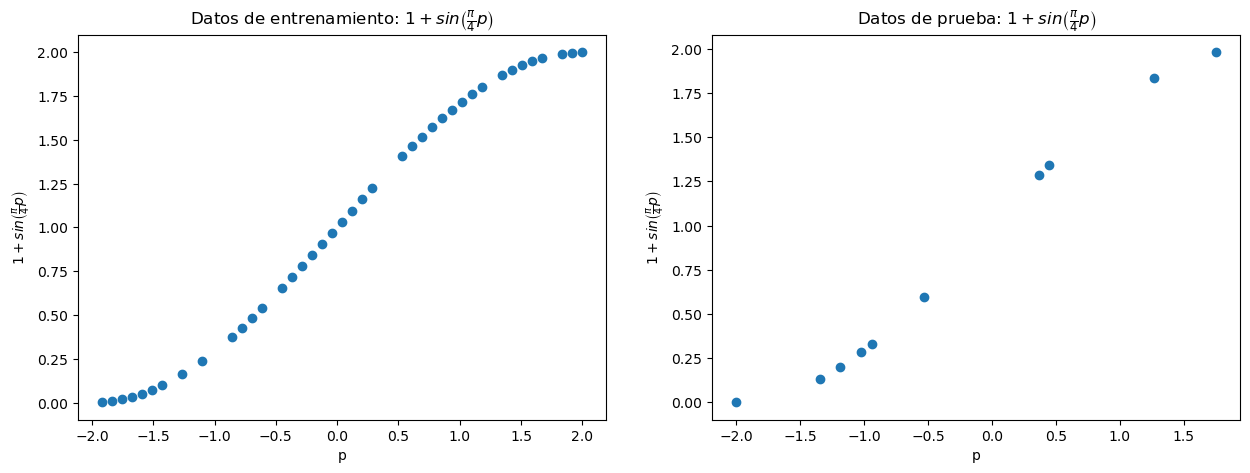

In [4]:
# Separamos datos de entrenamiento y prueba:
X_train1, X_test1, y_train1, y_test1 = train_test_split(p1, gp1, 
                                                        test_size = 0.2, random_state = 123)

# Graficamos datos de entrenamiento:
plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
ax=plt.gca()
plt.plot(X_train1, y_train1, 'o')
plt.title(r'Datos de entrenamiento: $1+sin\left(\frac{\pi}{4}p\right)$') 
plt.xlabel('p')
plt.ylabel(r'$1+sin\left(\frac{\pi}{4}p\right)$')

# Graficamos datos de prueba:
plt.subplot(1,2,2)
ax=plt.gca()
plt.plot(X_test1, y_test1, 'o')
plt.title(r'Datos de prueba: $1+sin\left(\frac{\pi}{4}p\right)$') 
plt.xlabel('p') 
plt.ylabel(r'$1+sin\left(\frac{\pi}{4}p\right)$')
plt.show()

In [13]:
# Inicializar
np.random.seed(12)

# Tasa de aprendizaje
alpha = 0.01  

# Parametros de la red
W1 = np.random.random([2,1])
b1 = np.random.random([2,1])
W2 = np.random.random([1,2])
b2 = np.random.random()

maxItera = 1000
itera    = 0

log_MSE = np.array([])

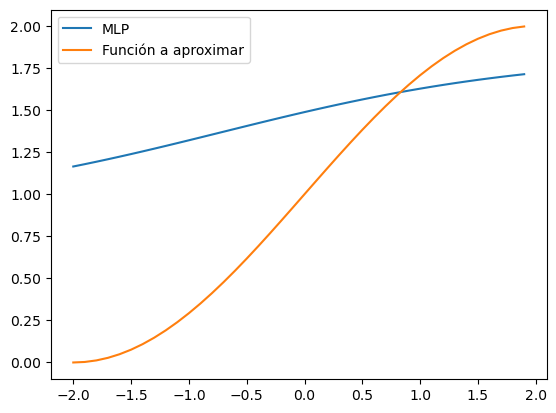

In [14]:
# Prueba
prueba = np.arange(-2, 2, 0.1) 
salida = np.array([])

for p in prueba:
    a1 = sigmoid(np.dot(W1,p)+b1)
    a2 = np.dot(W2,a1) + b2
    salida=np.append(salida,a2)

plt.plot(prueba, salida, label="MLP")
plt.plot(prueba, f1(prueba), label="Función a aproximar")
plt.legend()
plt.show()

In [15]:
# Entrenamiento
while itera < maxItera:
    # Creamos arreglos vacíos
    log_e = []
    log_a2 = []
    
    # Creamos ciclo para cada época / iteración:
    for a0 in X_train1:
    
        # Propagación hacia adelante:
        a1 = sigmoid(W1*a0 + b1)
        a2 = np.dot(W2,a1) + b2
        t = f1(a0)
        e = t - a2
        
        # Cálculo de sensibilidades por capa:
        S2 = -2*e
        Fn1 = np.array([[(1-float(a1[0]))*float(a1[0]), 0],
                 [0, (1-float(a1[1]))*float(a1[1])]])
        S1 = np.dot(Fn1,W2.T)*S2
        
        # Actualización de pesos y sesgos:
        new_W2 = W2 - alpha*S2*a1.T
        new_b2 = b2 - alpha*S2
        new_W1 = W1 - alpha*S1*a0.T
        new_b1 = b1 - alpha*S1
        

        W2 = new_W2
        b2 = new_b2
        W1 = new_W1
        b1 = new_b1
        log_a2.append(a2.item())
        
    # Error al final de la época
    MSE = np.square(np.subtract(y_train1,log_a2)).mean()
    log_MSE = np.append(log_MSE,MSE)

    itera+=1
    
print("Iteraciones: ", itera)
print("Error cuadrático medio final: ", "{:.4}".format(log_MSE[itera-1]))

Iteraciones:  1000
Error cuadrático medio final:  0.0001131


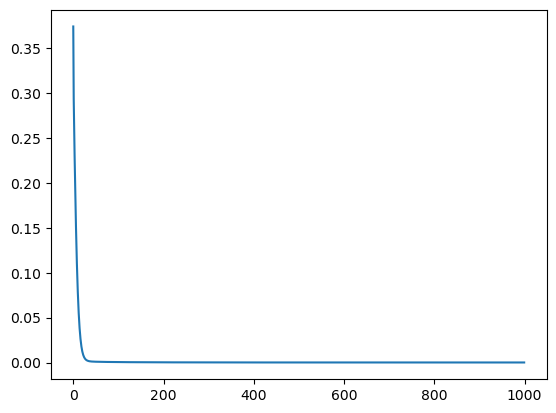

In [16]:
plt.plot(log_MSE)

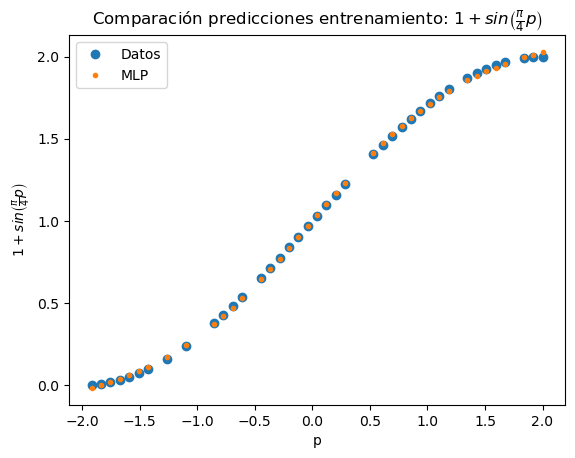

In [17]:
# Graficamos datos de entrenamiento, contra predicciones de nuestro modelo
plt.plot(X_train1, y_train1, 'o', label ='Datos')
plt.plot(X_train1, log_a2, '.', label='MLP')
plt.legend()
plt.title(r'Comparación predicciones entrenamiento: $1+sin\left(\frac{\pi}{4}p\right)$') 
plt.xlabel('p') 
plt.ylabel(r'$1+sin\left(\frac{\pi}{4}p\right)$') 
plt.show()

In [21]:
import sklearn.neural_network

# Entrenando el modelo de scikit-learn:
X_train1_sk = X_train1.reshape(-1,1)
X_test1_sk = X_test1.reshape(-1,1)
modelo1 = sklearn.neural_network.MLPRegressor(
        hidden_layer_sizes = (2),
        activation = "logistic",
        learning_rate_init = 0.05,
        max_iter = 1000,
        solver = "sgd",
        random_state = 2
        )
modelo1.fit(X_train1_sk, y_train1)

print("Número de capas: ", modelo1.n_layers_, "\n") 
print("Pesos: ", modelo1.coefs_, "\n")
print("Sesgos: ", modelo1.intercepts_, "\n") 
print("Número de iteraciones: ", modelo1.n_iter_, "\n")

Número de capas:  3 

Pesos:  [array([[ 1.22903561, -1.27541879]]), array([[ 1.23877173],
       [-1.50201251]])] 

Sesgos:  [array([-0.13679121, -0.24992695]), array([1.09995716])] 

Número de iteraciones:  54 



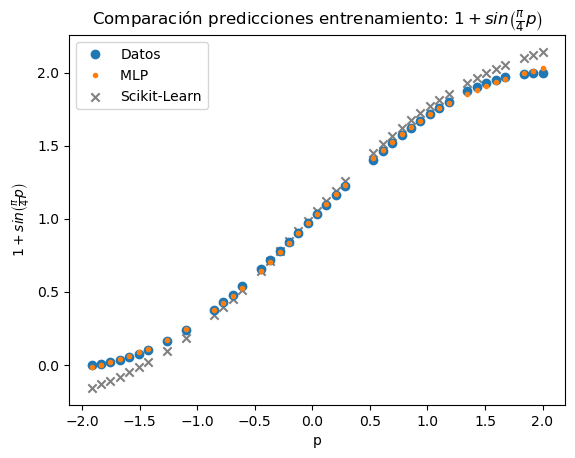

In [22]:
# Graficamos datos de entrenamiento, contra predicciones de nuestro modelo y Sciikit-learn
plt.plot(X_train1, y_train1, 'o', label ='Datos')
plt.plot(X_train1, log_a2, '.', label='MLP ')
plt.scatter(X_train1_sk, modelo1.predict(X_train1_sk), marker='x',
            color='grey', label='Scikit-Learn')
plt.legend()
plt.title(r'Comparación predicciones entrenamiento: $1+sin\left(\frac{\pi}{4}p\right)$') 
plt.xlabel('p') 
plt.ylabel(r'$1+sin\left(\frac{\pi}{4}p\right)$') 
plt.show()

## Prueba

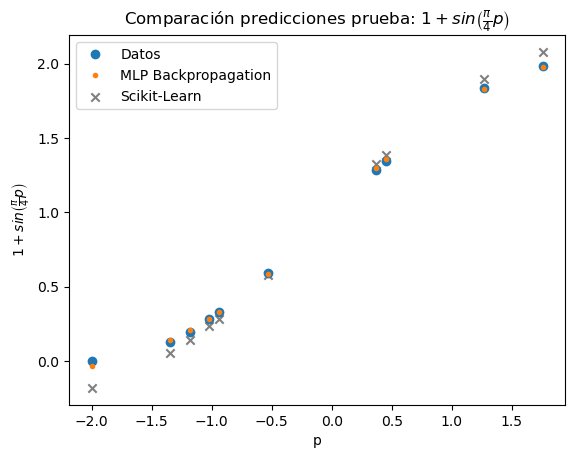

Error cuadrático medio de nuestro modelo con datos de prueba:  0.0001867
Error cuadrático medio de SKLearn con datos de prueba:  0.006135


In [23]:
# Creamos variables auxiliares:
yH = np.array([])

# Creamos ciclo para la época:
for a0 in X_test1:
    # Propagación hacia adelante:
    a1 = sigmoid(W1*a0 + b1)
    a2 = np.dot(W2,a1) + b2
    yH = np.append(yH,a2)

ySK = modelo1.predict(X_test1_sk)

# Graficamos datos de prueba, contra predicciones de nuestro modelo y de scikit-learn:
plt.plot(X_test1, y_test1, 'o', label ='Datos')
plt.plot(X_test1, yH, '.', label='MLP Backpropagation')
plt.scatter(X_test1, ySK, marker='x', color='grey',label='Scikit-Learn')
plt.legend()
plt.title(r'Comparación predicciones prueba: $1+sin\left(\frac{\pi}{4}p\right)$') 
plt.xlabel('p') 
plt.ylabel(r'$1+sin\left(\frac{\pi}{4}p\right)$') 
plt.show()

MSE   = np.square(np.subtract(y_test1,yH)).mean()
MSEsk = np.square(np.subtract(y_test1,ySK)).mean()

print("Error cuadrático medio de nuestro modelo con datos de prueba: ", "{:.4}".format(MSE))
print("Error cuadrático medio de SKLearn con datos de prueba: ", "{:.4}".format(MSEsk))

In [2]:
modelo1.n_layers_

NameError: name 'modelo1' is not defined

In [ ]:
modelo1.n_layers_